#                 Credit Card Fraud Detection

## Problem Statement:
Analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. The dataset has a total of 2,84,807 transactions, out of which 492 are fraudulent. 
 
Banking fraud poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

In the banking industry, credit card fraud detection using machine learning is a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. 

## Objective:
To predict fraudulent credit card transactions with the help of machine learning models.

## Credit Card Fraud Detection

### Steps-

   - Exploratory data analysis
      - Plotting the Distribution
      
   - Check and Mitigate Skewness

   - Test/Train Split

   - Model Building on Imbalanced(Raw) Data
       - Logistic Regression
       - K-NN (Nearest Neighbour)
       - Decision Tree
       - Random Forest
       - SVM
       - XGBOOST
       
   - Stratified K-Fold Cross Validation on Data
      - Create Evaluation Model
      - Evaluate Models
        - Logistic Regression
        - K-NN (Nearest Neighbour)
        - Decision Tree
        - Random Forest
        - SVM
        - XGBOOST 

   - Hyperparameter Tuning
      - K-NN (Nearest Neighbour)
      - Random Forest
      - XGBOOST 

   - Class Balancing
    - Model Building with SMOTE
      - KNN
      - Random Forest
      - XGBOOST
      - Logistic Regression
      
    - Model Building with ADASYN
      - KNN
      - Random Forest
      - XGBOOST    
    
    - Conclusion
      - Model Prediction and Evaluation
      - Result

In [ ]:
#Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',500)

# Importing packages required to build different models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Step 1: Exploratory Data Analysis

In [ ]:
#Read the dataset into dataframe
df = pd.read_csv(r'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check basic metadata
df.shape

(284807, 31)

In [ ]:
# Check statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All the features are in numeric form


In [ ]:
# Check for Null values

df.isnull().any().any()

False

No missing values

#### Plotting the Distribution

In [ ]:
#Check the percentage of fraudulent and non-fraudulent transactions
classes=df['Class'].value_counts()
frauds = classes[1]
non_frauds = classes[0]
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print('There are {} ({:.3f}%) non-fraudulent transactions and {} ({:.3f}%) fraudulent transactions.'.format(non_frauds, normal_share, frauds, fraud_share))

There are 284315 (99.827%) non-fraudulent transactions and 492 (0.173%) fraudulent transactions.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

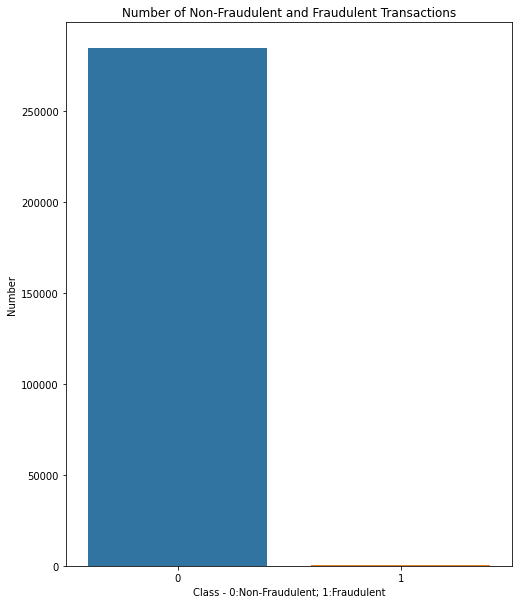

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8,10))
sns.barplot(x=classes.index, y=classes)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

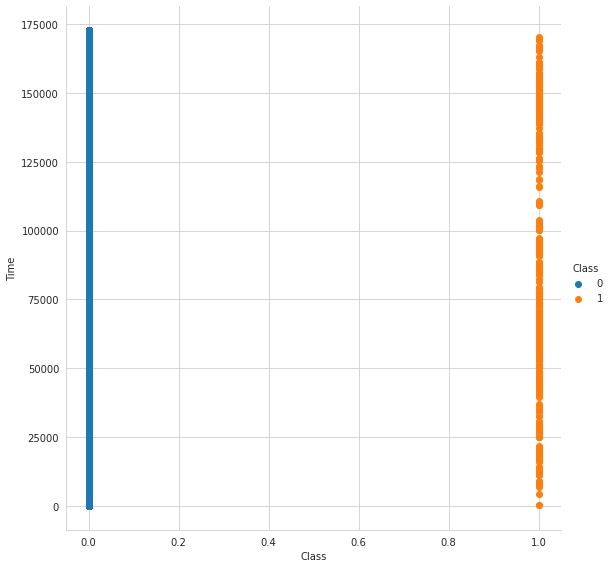

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 8).map(plt.scatter, "Class", "Time").add_legend()
plt.show()

This does not add any clear information to the labels

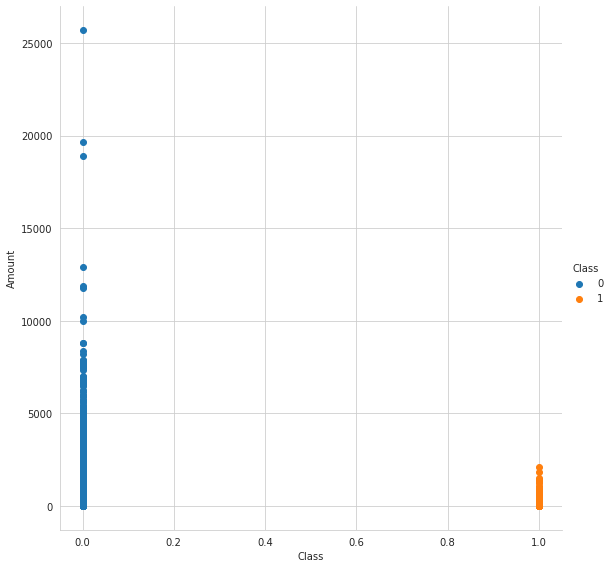

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 8).map(plt.scatter,  "Class","Amount").add_legend()
plt.show()

We observe the amount falls under 2500 for the fraudulent transactions

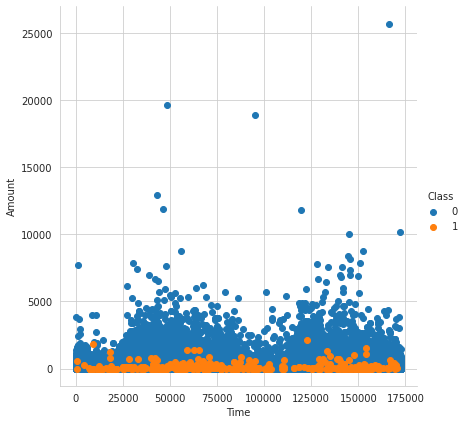

In [ ]:
# Scatterplot of "Time" and "Amount"
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

This does not add any clear information

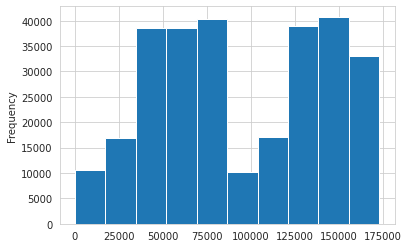

In [ ]:
# Plot "Time" Distribution
df["Time"].plot.hist()

Text(0.5, 1.0, 'Heatmap of Correlation')

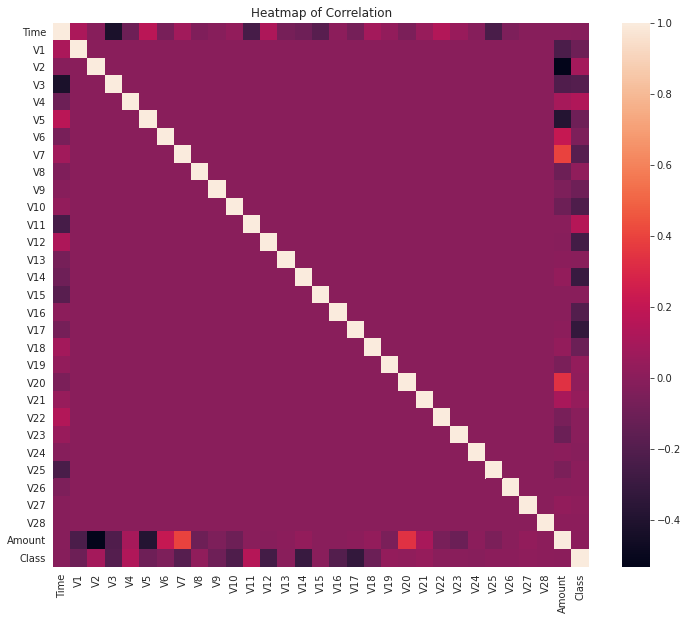

In [ ]:
# Check correlation among the features
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

There is no notable correlation between features V1-V28. There are certain correlations between some of these features with Time and Amount 

In [ ]:
# Time variable is not a time series data, it is just time elapsed after first transaction which is adding no information to model. 
# Hence, drop "Time" variable
df = df.drop(['Time'],axis=1)

#Check dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Split data and labels into X and y 

In [ ]:
y = df.Class
X = df.drop("Class",1) # take out the target variable

In [ ]:
# Check the dataset 
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Step 2: Check and Mitigate Skewness

Plotting the distribution of a variable

<Figure size 432x288 with 0 Axes>

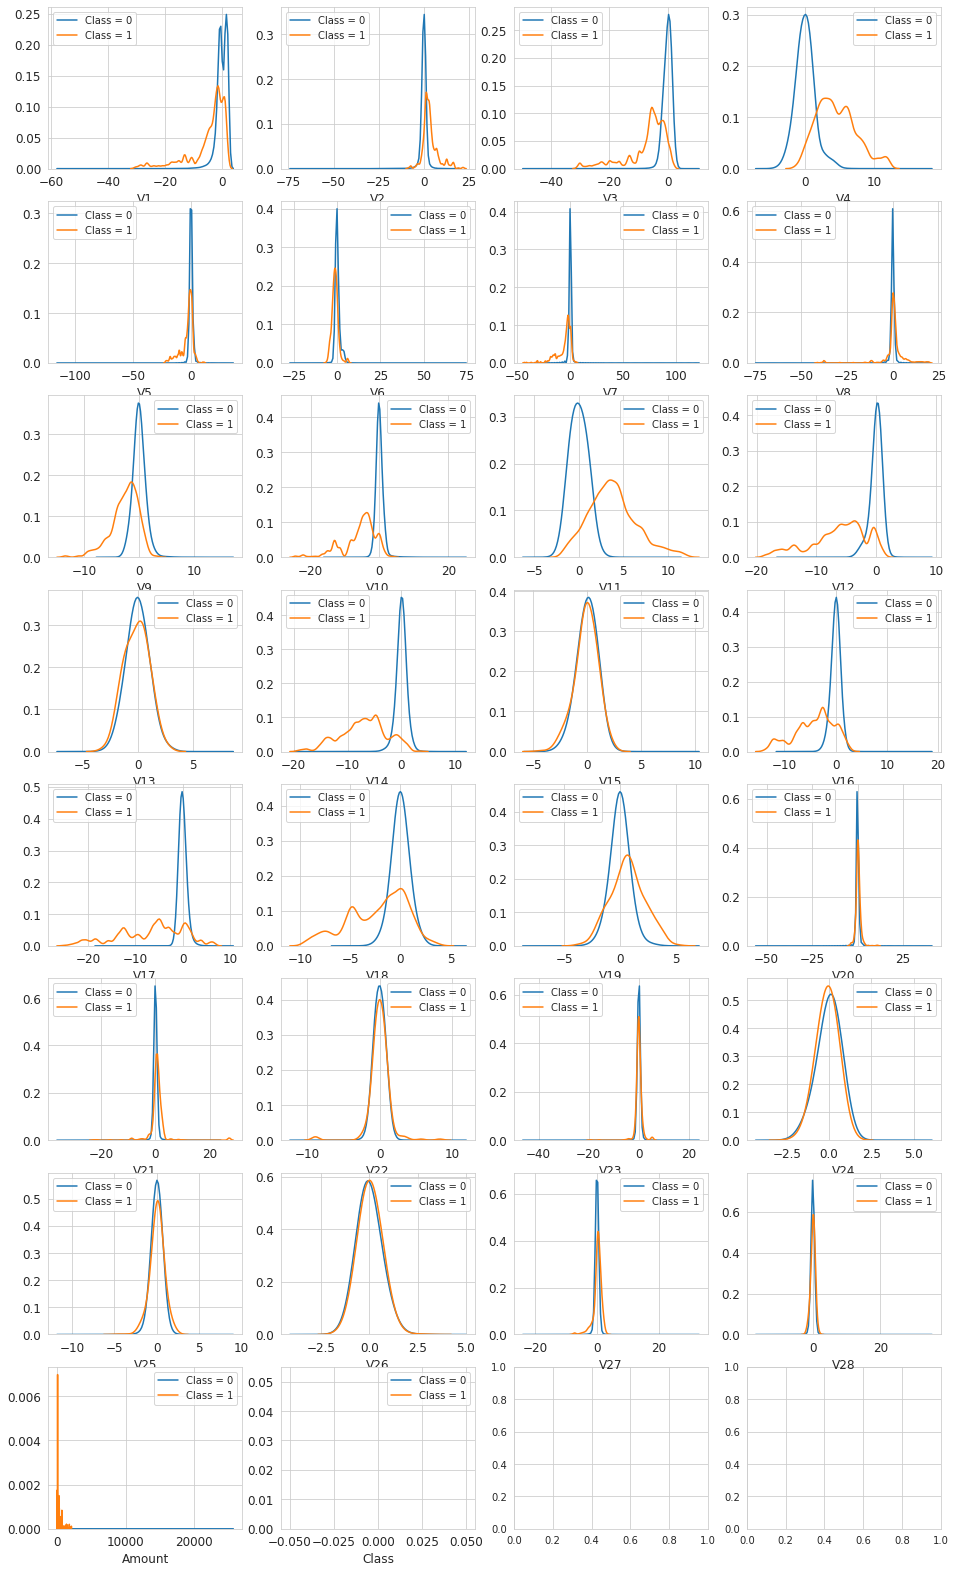

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

As all the features are gaussian. For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1 and V12, V14,V16,V17and V18 are partially separated, V1, V2, V3,V9, V10 have a quite distinct profile, while V20 to V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

Text(0.5, 1.0, 'V1-V28, Amount Skewnesses')

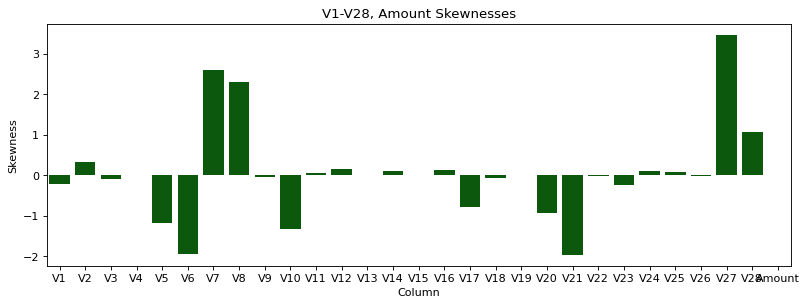

In [ ]:
# plot the variables from the dataset to see the skewness

#Let's compare the stats of the PCA variables V1-V28
pca_vars = ['V%i' % k for k in range(1,29)]
pca_vars.append('Amount')
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28, Amount Skewnesses')

##### This shows a skewed data and the skewness scale is -10 to 15 and above

#### There is skewness present in the distribution. We will use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False) 
skl_t = pt.fit_transform(X)
X = pd.DataFrame(data=skl_t, columns = pca_vars)

Text(0.5, 1.0, 'V1-V28, Amount Skewnesses')

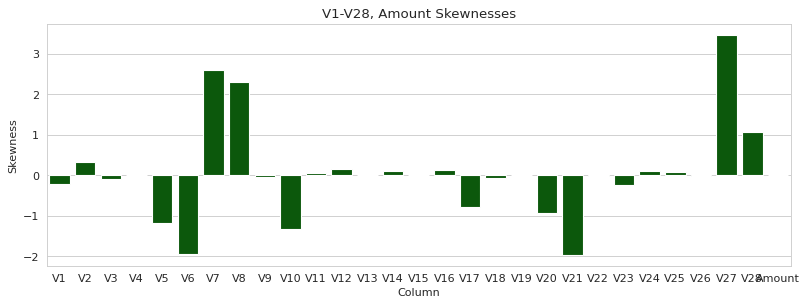

In [ ]:
# plot the variables from the dataset again to see the result 
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28, Amount Skewnesses')

In [ ]:
# Check "Amount"
X['Amount'].describe()

count    2.848070e+05
mean     4.171443e-15
std      1.000002e+00
min     -2.013010e+00
25%     -7.509351e-01
50%      2.710132e-02
75%      7.483193e-01
max      3.674446e+00
Name: Amount, dtype: float64

##### The skewness has been significantly reduced to the scale of -2 to 3.5.
##### This has also normalized the "Amount" feature, hence , no need to scale "Amount" separately 

### Step 3: Test/Train Split

In [ ]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.30,random_state=101)

Preserve X_test & y_test to evaluate on the test data once you build the model


In [ ]:
# Check Y statistics
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Step 4:  Model Building on Imbalanced(Raw) Data

##### Build different models on the imbalanced(raw) dataset

#### Logistic Regression

In [ ]:
# Initialise Logistic Regression model
logR= LogisticRegression(random_state = 101)

logR.fit(X_train,y_train)

#Predict the result on test data
predictR = logR.predict(X_test)

In [ ]:
# Print evaluation metrics report on predicted values
print(classification_report(y_test,predictR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.66      0.75       148

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Print confusion metrics on predicted values
print(confusion_matrix(y_test,predictR))

[[85281    14]
 [   50    98]]


##### ROC CURVE - LR - Imbalanced Data

In [ ]:
# Print AUC score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictR)
roc_auc_lr = auc(false_positive_rate, true_positive_rate)
print (roc_auc_lr)

0.8309990129645444


Text(0.5, 0, 'False Positive Rate')

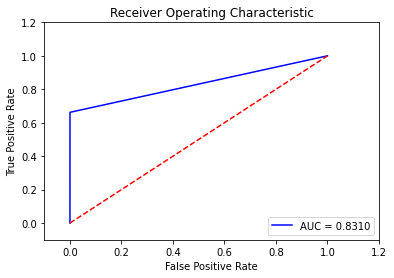

In [ ]:
# Plot ROC curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_lr)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We are getting 83.10% AUR-ROC score through Logistic Regression with Imbalaced data

#### K-NN (Nearest Neighbour)

In [ ]:
# Initialize KNN Model
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Prdeict the result on test data
predictKNN = knn.predict(X_test)

In [ ]:
# Print confusion metrics on predicted values
print(confusion_matrix(y_test,predictKNN))

[[85283    12]
 [   28   120]]


In [ ]:
# Print evaluation metrics report on predicted values
print(classification_report(y_test,predictKNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.81      0.86       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Print AUC score for KNN
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictKNN)
roc_auc_KNN = auc(false_positive_rate, true_positive_rate)
print (roc_auc_KNN)

0.9053291992971928


Text(0.5, 0, 'False Positive Rate')

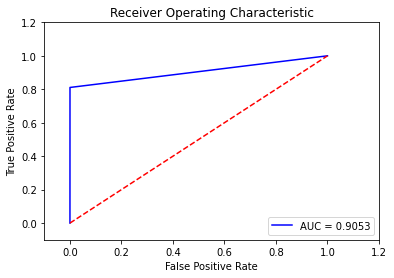

In [ ]:
# Plot ROC curve for KNN

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_KNN)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So with KNN we are getting around 90.53% AUC-ROC score


#### Decision Tree

In [ ]:
# Initialize Decision tree
dtree = DecisionTreeClassifier(random_state = 101)

dtree.fit(X_train, y_train)

# Predict result on test data
predictDT = dtree.predict(X_test)

In [ ]:
# Print confusion metrics on predicted values
print(confusion_matrix(y_test,predictDT))

[[85249    46]
 [   29   119]]


In [ ]:
# Print evaluation metrics report on predicted values
print(classification_report(y_test,predictDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.80      0.76       148

    accuracy                           1.00     85443
   macro avg       0.86      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Print AUC score for decision tree

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictDT)
roc_auc_dt = auc(false_positive_rate, true_positive_rate)
print (roc_auc_dt)

0.9017573746441205


Text(0.5, 0, 'False Positive Rate')

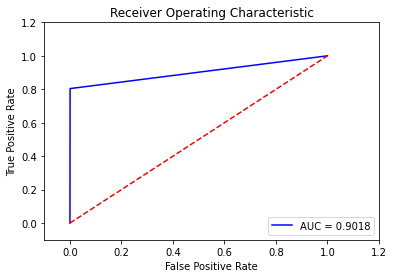

In [ ]:
# Plot ROC curve for decision tree

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_dt)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So with Decision tree we are getting around 90.18% AUC-ROC socre which is better that Logistic regression

#### Random Forest

In [ ]:
# Initialize Random forest
rf = RandomForestClassifier(random_state = 101)
rf.fit(X_train, y_train)

# Predict result on test data
predictRF = rf.predict(X_test)

In [ ]:
# Print confusion metrics on predicted values
print(confusion_matrix(y_test,predictRF))

[[85286     9]
 [   27   121]]


In [ ]:
# Print evaluation metrics report on predicted values
print(classification_report(y_test,predictRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.82      0.87       148

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Print AUC score for Random forest
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictRF)
roc_auc_rf = auc(false_positive_rate, true_positive_rate)
print (roc_auc_rf)

0.9087368877171914


Text(0.5, 0, 'False Positive Rate')

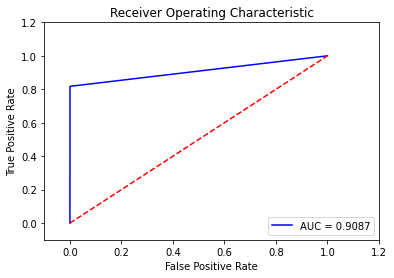

In [ ]:
# Plot ROC curve for random forest

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC-ROC score for Random Forest is 90.87%

#### SVM

In [ ]:
# Initialize SVM

svm = SVC(kernel = 'linear', random_state = 101)
svm.fit(X_train, y_train)

#Predict result on test data
predictSVM = svm.predict(X_test)

In [ ]:
# Print confusion metrics on predicted values
print(confusion_matrix(y_test,predictSVM))

[[85271    24]
 [   29   119]]


In [ ]:
# Print evaluation metrics report on predicted values
print(classification_report(y_test,predictSVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# Print AUC score for SVM
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictSVM)
roc_auc_SVM = auc(false_positive_rate, true_positive_rate)
print (roc_auc_SVM)

0.9018863388272498


Text(0.5, 0, 'False Positive Rate')

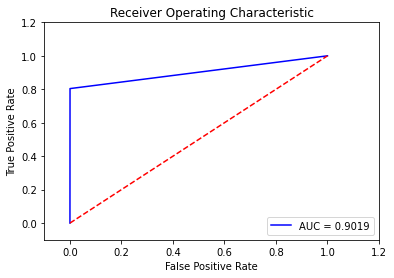

In [ ]:
# Plot ROC curve for SVM

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_SVM)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC score for SVM is 90.19%

#### XGBOOST

In [ ]:
# XGB model 
xgb = XGBClassifier(random_state = 101) 

xgb.fit(X_train,y_train)

y_predxgb = xgb.predict(X_test)
print(confusion_matrix(y_test, y_predxgb))
print('Accuracy: ',accuracy_score(y_predxgb, y_test))

roc_auc_xgb = roc_auc_score(y_test, y_predxgb)
print("XGB ROC-AUC Score on test data: %f" % (roc_auc_xgb))

[[85286     9]
 [   29   119]]
Accuracy:  0.9995552590615966
XGB ROC-AUC Score on test data: 0.901974


Text(0.5, 0, 'False Positive Rate')

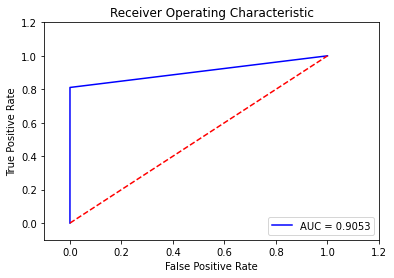

In [ ]:
# Plot ROC curve for SVM

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predxgb)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_xgb)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Score of AUC for XGBOOST is 90.53%


### Step 5: Stratified K-Fold Cross Validation on Data

#### Create Evaluation Model

In [ ]:
#Create Stratified k-Fold cross verified train/test data model

#Initialize
skl = StratifiedKFold(n_splits=5, random_state=101, shuffle=True)

# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	skl = StratifiedKFold(n_splits=5, random_state=101, shuffle=True)
	# define the model evaluation the metric
	
	scores = cross_val_score(model, X, y, cv=skl, n_jobs=-1)
	return scores

#### Evaluate Models

#### Logistic Regression

In [ ]:
scores = evaluate_model(X_train,y_train, logR
                        )
# summarize performance
print(scores)

[0.99909713 0.99922253 0.99907205 0.99924761 0.99924759]


#### KNN

In [ ]:
scores = evaluate_model(X_train,y_train, knn)

# summarize performance
print(scores)

[0.99932285 0.99957365 0.99917237 0.99949841 0.99952348]


#### Decision Tree

In [ ]:
scores = evaluate_model(X_train,y_train, dtree)

# summarize performance
print(scores)

[0.99937301 0.99907205 0.99904697 0.99909713 0.99912219]


#### Random Forest

In [ ]:
scores = evaluate_model(X_train,y_train, rf)
                        
# summarize performance
print(scores)

[0.99952349 0.99952349 0.99934793 0.99954857 0.99952348]


#### SVM

In [ ]:
scores = evaluate_model(X_train,y_train, svm) 

# summarize performance
print(scores)

[0.99939809 0.99942317 0.99914729 0.99934793 0.99952348]


#### XGBOOST

In [ ]:
scores = evaluate_model(X_train,y_train, xgb)

# summarize performance
print(scores)

[0.99949841 0.99949841 0.99934793 0.99954857 0.99964888]


##### Since this is seen data as test set, all models are performining good. However, the validation set scores are the real basis of accuracy since that is an unseen data. We have already evaluated all basic models on the validation set, that is the original test set. Validation set scores are present in the previous "Model Building" session

### Step 6: HyperParameter Tuning

##### We will now carry on with the best performing models, tune them and improve the results. Discarding SVM, Decision Tree and Logistic Regression modelfor hyperparameter tuning as Logistic Regression is not performing good and SVM is time consuming too for such a large dataset. Since we are already using Random Forest , we can discard decision tree as RF is performing better

##### KNN

In [ ]:
# Create the random grid
random_grid = {
    'n_neighbors': [3,5,7],
    'weights' : ['uniform', 'distance'],
    'leaf_size'  : [10,20,30],
    'p': [1,2],
    'algorithm'  : ["auto","ball_tree","kd_tree","brute"]
}

# Instantiate the random search model
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the grid search to the data
knn_random.fit(X_train, y_train)

#Show best features
knn_random.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 100.6min finished


{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [ ]:
knn_random.cv_results_

{'mean_fit_time': array([0.05964327, 1.23467946, 1.38363838, 1.23756989, 0.95368409]),
 'mean_score_time': array([ 447.26981958,  575.13388133,  635.2144932 ,  921.62885602,
        1248.20969701]),
 'mean_test_score': array([0.99944825, 0.99946329, 0.99939809, 0.99950342, 0.99937802]),
 'param_algorithm': masked_array(data=['brute', 'auto', 'kd_tree', 'kd_tree', 'ball_tree'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_leaf_size': masked_array(data=[10, 20, 10, 30, 20],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[7, 5, 7, 3, 7],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 2, 1, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked

In [ ]:
# Predict result on test data
predictknn_best = knn_random.predict(X_test)

In [ ]:
#Print confusion matrix
print(confusion_matrix(y_test,predictknn_best))

[[85283    12]
 [   26   122]]


In [ ]:
#Print evaluation metrics score
print(classification_report(y_test,predictknn_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.82      0.87       148

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictknn_best)
roc_auc_knn_best = auc(false_positive_rate, true_positive_rate)
print (roc_auc_knn_best)

0.9120918180622736


Text(0.5, 0, 'False Positive Rate')

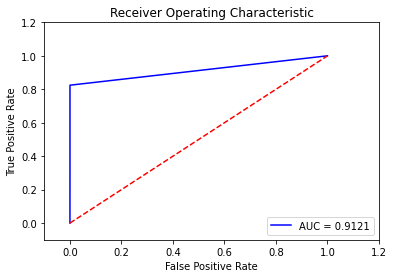

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_knn_best)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC-ROC score has improved from 90.53 to 91.21% after hyperparameter tuning

##### Random Forest

In [ ]:
#Existing params used
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [ ]:
#Create random parameters
param_comb = 5
random_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10,30,50],
    'min_samples_leaf': range(1, 2, 4),
    'min_samples_split': range(2, 4, 8),
    'max_features': ['auto', 'sqrt'],
    'bootstrap' : [True, False]
}

# Instantiate the random search model
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter =param_comb, cv = 5, verbose=2, random_state=101, n_jobs = -1)

# Fit the grid search to the data
rf_random.fit(X_train, y_train)

#Show best features
rf_random.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 103.7min finished


{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
rf_random.cv_results_

{'mean_fit_time': array([ 187.02016168,  374.81102014,  561.15730309, 1002.84788542,
         312.38154435]),
 'mean_score_time': array([0.41590843, 1.12469974, 1.23241568, 1.8317297 , 0.61048021]),
 'mean_test_score': array([0.99950342, 0.99950844, 0.99950844, 0.99951345, 0.99950844]),
 'param_bootstrap': masked_array(data=[False, True, False, False, False],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 30, 10, 50, 50],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, 1, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 

In [ ]:
# Predict result on test data
predictrf_best = rf_random.predict(X_test)

In [ ]:
#Print confusion matrix
print(confusion_matrix(y_test,predictrf_best))

[[85288     7]
 [   27   121]]


In [ ]:
#Print evaluation metrics score
print(classification_report(y_test,predictrf_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.82      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictrf_best)
roc_auc_rf_best = auc(false_positive_rate, true_positive_rate)
print (roc_auc_rf_best)

0.9087427497255153


Text(0.5, 0, 'False Positive Rate')

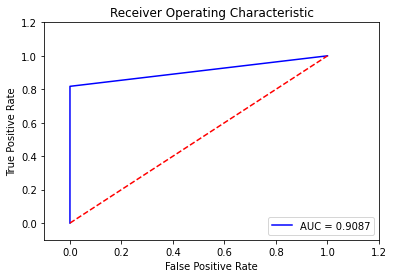

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_rf_best)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC-ROC score for RF remains the same at 90.87%

##### XGBOOST

In [ ]:
# Current parameters used
print(xgb.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
#Random features
param_comb=5
params = {
        'min_child_weight': [1, 2,5],
        'subsample': [0.6,0.8, 1.0],
        'colsample_bytree': [0.6,0.8, 1.0],
        'max_depth': [2,4, 7],
        'learning_rate': [0.3,0.4,0.6],
        'n_estimators':[150,175,200]

        }

# Instantiate the random search model
xgb_random = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=5, 
                                   verbose=3, random_state=101 )

# Fit the grid search to the data
xgb_random.fit(X_train, y_train)

#Show best features
xgb_random.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 18.5min finished


{'colsample_bytree': 1.0,
 'learning_rate': 0.4,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 175,
 'subsample': 1.0}

In [ ]:
xgb_random.cv_results_

{'mean_fit_time': array([103.27566233,  59.24218335,  88.05096526, 123.02745576,
         68.63085794]),
 'mean_score_time': array([0.38325014, 0.27760673, 0.30989208, 0.42076945, 0.33618526]),
 'mean_test_score': array([0.97360086, 0.97719845, 0.97667066, 0.97810951, 0.97480021]),
 'param_colsample_bytree': masked_array(data=[1.0, 0.8, 1.0, 1.0, 0.6],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.3, 0.4, 0.4, 0.4, 0.3],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[4, 2, 2, 4, 7],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_child_weight': masked_array(data=[2, 2, 1, 1, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': mask

In [ ]:
# Predict result on test data
predictxgb_best = xgb_random.predict(X_test)

In [ ]:
#Print confusion matrix
print(confusion_matrix(y_test,predictxgb_best))

[[85284    11]
 [   25   123]]


In [ ]:
#Print evaluation metrics score
print(classification_report(y_test,predictxgb_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.83      0.87       148

    accuracy                           1.00     85443
   macro avg       0.96      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print AUC Score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,predictxgb_best)
roc_auc_xgb_best = auc(false_positive_rate, true_positive_rate)
print (roc_auc_xgb_best)

0.915476058448976


Text(0.5, 0, 'False Positive Rate')

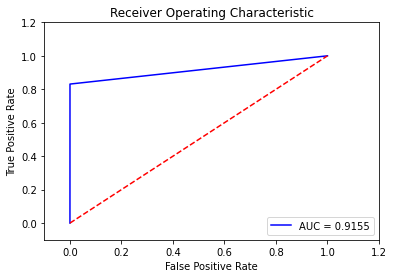

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_xgb_best)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC-ROC score for XGBOOST has improved from 90.53 to 91.55% after hyperparameter tuning.

### Step 7: Class Balancing

#### SMOTE -Synthetic Minority Over-Sampling Technique

In [ ]:
# Create train data using SMOTE

oversampler=SMOTE(random_state=101)
X_train_smote,y_train_smote=oversampler.fit_sample(X_train,y_train)

##### KNN 

In [ ]:
#Initialize with best hyperparameters tuned- the same we got from tuning the model
knn_best = KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree', leaf_size=30, p=1, weights='distance')

# Predict values with hyperparameter tuned model on SMOTE data

knn_best.fit(X_train_smote,y_train_smote)
predictknn_smote = knn_best.predict(X_test)

In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictknn_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.60      0.85      0.70       148

    accuracy                           1.00     85443
   macro avg       0.80      0.93      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictknn_smote))

[[85211    84]
 [   22   126]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictknn_smote)
roc_auc_knn_smote = auc(false_positive_rate, true_positive_rate)
print (roc_auc_knn_smote)

0.9251832669764553


Text(0.5, 0, 'False Positive Rate')

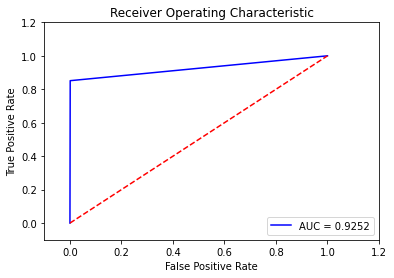

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_knn_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score improved with balanced data for KNN with SMOTE balancing technique to 92.52 % 

##### Random Forest

In [ ]:
#Initialize with best hyperparameters tuned- the same we got from tuning the model
rf_best = RandomForestClassifier(random_state = 101, bootstrap= False, max_depth= 50, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 300)

# Predict values with hyperparameter tuned model on SMOTE data

rf_best.fit(X_train_smote,y_train_smote)
predictrf_smote = rf_best.predict(X_test)

In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictrf_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.82      0.86       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictrf_smote))

[[85281    14]
 [   26   122]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictrf_smote)
roc_auc_rf_smote = auc(false_positive_rate, true_positive_rate)
print (roc_auc_rf_smote)

0.9120800940456255


Text(0.5, 0, 'False Positive Rate')

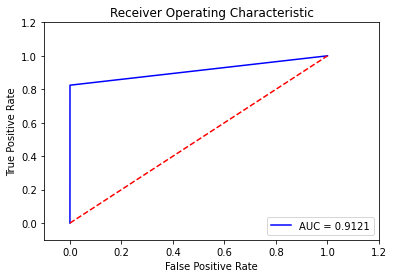

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_rf_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score imprved with balanced data for Random Forest with SMOTE balancing technique from 90.87 to 91.21 % 

##### XGBOOST

In [ ]:
# Predict values with hyperparameter tuned model on SMOTE data

xgb_random.fit(X_train_smote,y_train_smote)
predictxgb_smote = xgb_random.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 46.6min finished


In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictxgb_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.84      0.80       148

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictxgb_smote))

[[85255    40]
 [   23   125]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictxgb_smote)
roc_auc_xgb_smote = auc(false_positive_rate, true_positive_rate)
print (roc_auc_xgb_smote)

0.9220628169643353


Text(0.5, 0, 'False Positive Rate')

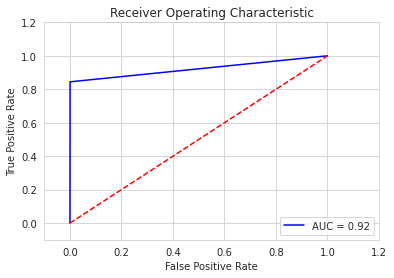

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_xgb_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score improved to 92.20% with balanced data for XGBOOST with SMOTE balancing technique 

##### Logistic Regression

We will try building the basic regression model with balanced data on SMOTE to see if there is any performance improvement.

In [ ]:
# Predict values with hyperparameter tuned model on SMOTE data

logR.fit(X_train_smote,y_train_smote)
predictlogR_smote = logR.predict(X_test)

In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictlogR_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.91      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictlogR_smote))

[[82827  2468]
 [   13   135]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictlogR_smote)
roc_auc_logR_smote = auc(false_positive_rate, true_positive_rate)
print (roc_auc_logR_smote)

0.9416136445373213


Text(0.5, 0, 'False Positive Rate')

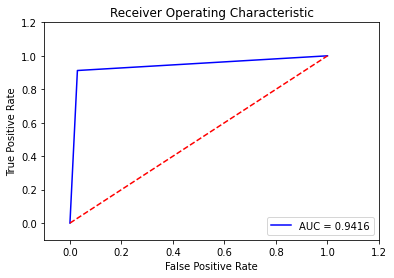

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_logR_smote)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score imprved with balanced data for logistic regression with SMOTE balancing technique from 83 to 94.16 %. However, the f1-score is very low which does not make this model useful. 

#### ADASYN

In [ ]:
# Create train data using ADASYN

oversampler=ADASYN(random_state=101)
X_ada, y_ada = oversampler.fit_resample(X_train,y_train)

##### Models have already been initialized with best parameters in SMOTE, we will use the same models in ADASYN

##### KNN 

In [ ]:
# Predict values with hyperparameter tuned model on ADASYN data

knn_best.fit(X_ada, y_ada)
predictknn_ada = knn_best.predict(X_test)

In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictknn_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.59      0.85      0.70       148

    accuracy                           1.00     85443
   macro avg       0.80      0.93      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictknn_ada))

[[85209    86]
 [   22   126]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictknn_ada)
roc_auc_knn_ada = auc(false_positive_rate, true_positive_rate)
print (roc_auc_knn_ada)

0.9251715429598072


Text(0.5, 0, 'False Positive Rate')

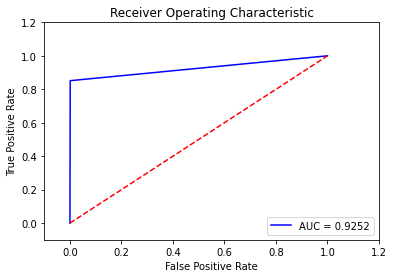

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_knn_ada)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score improved with balanced data for KNN with ADASYN balancing technique to 92.52 % 

##### Random Forest

In [ ]:
# Predict values with hyperparameter tuned model on SMOTE data

rf_best.fit(X_ada, y_ada)
predictrf_ada = rf_best.predict(X_test)

In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictrf_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.82      0.86       148

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictrf_ada))

[[85282    13]
 [   27   121]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictrf_ada)
roc_auc_rf_ada = auc(false_positive_rate, true_positive_rate)
print (roc_auc_rf_ada)

0.9087075776755711


Text(0.5, 0, 'False Positive Rate')

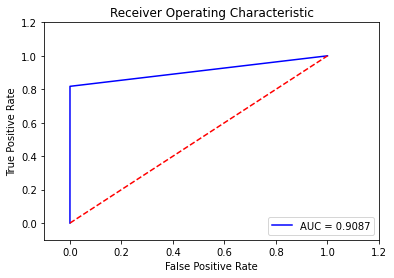

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f'% roc_auc_rf_ada)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score for Random Forest with ADASYN balancing technique is 90.87%

##### XGBOOST

In [ ]:
# Predict values with hyperparameter tuned model on ADASYN data

xgb_random.fit(X_ada, y_ada)
predictxgb_ada = xgb_random.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 45.3min finished


In [ ]:
# Print evaluation metrics report
print(classification_report(y_test,predictxgb_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.86      0.80       148

    accuracy                           1.00     85443
   macro avg       0.88      0.93      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#Print confusion metrics
print(confusion_matrix(y_test,predictxgb_ada))

[[85254    41]
 [   21   127]]


In [ ]:
#Print AUC Score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictxgb_ada)
roc_auc_xgb_ada = auc(false_positive_rate, true_positive_rate)
print (roc_auc_xgb_ada)

0.9288137117127679


Text(0.5, 0, 'False Positive Rate')

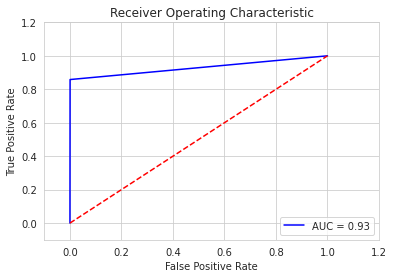

In [ ]:
#Plot ROC Curve

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc_xgb_ada)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

So the AUC score with balanced data for XGBOOST with ADASYN balancing technique is 93%

### Step 8: Conclusion

#### Model  Prediction and Evaluation:

##### KNN - Accuracy- 1.0 AUC- 92.52  Precision- .80 Recall- .93 f1-score- .85
The score improved from 90.53 on raw data to 91.20 with hyperparameter tuning and then further improved to 92.52% with both SMOTE and ADASYN balanced data. It has a resonable precision, recall and f1-score.
#### LR - Accuracy-  0.97 AUC- 94.16  Precision- .53 Recall- .94 f1-score- .54
Logistic Regression score improved from 83 to 94.16% but the f1-score is low, which suggests the model is not useful, since we need a good balance of precision and recall for this dataset.
##### RF - Accuracy- 1.0 AUC- 91.21  Precision- .95 Recall- .91 f1-score- .93
Random Forest performed good with AUC improving from 90.87 to 91.21% with hyperparameter tuned model with SMOTE balanced data. It has good precision, recall and f1-score. This model is useful.
##### XGB - Accuracy- 1.0 AUC- 93  Precision- .88 Recall- .93 f1-score- .90
XGBOOST performance improved to 93% which is the best of all the models. It has resonable precision, recall and f1-score too. This model is useful.


#### Result:

The best performing models after hyperparameter tuning and Balancing Data are-
##### XGBOOST and Random Forest
With a high Accuracy, ROC-AUC score and good trade-off between precision and recall,good f1-score these two models are the best for credit card fraud detection.
However, since this is an imbalanced dataset, we need higher precision and recall, which is given by Random  Forest.
